In [0]:
import keras
import pandas as pd
from keras.layers import Dense, LSTM, Dropout
from keras.models import Sequential
import numpy as np
from keras.callbacks import EarlyStopping

In [0]:
data=pd.read_csv("/content/processed_vehicle_accidents (1).csv",parse_dates=['Date'])
print(data.describe())


          Unnamed: 0        Unit_ID  ...  Vehicle_Owner_ID           Time
count  233984.000000  233984.000000  ...      2.339840e+05  233984.000000
mean   211815.208407    1187.454377  ...      2.016750e+09      14.348314
std    119444.765264     602.771835  ...      1.322442e+06       4.410570
min         0.000000      57.000000  ...      2.014000e+09       0.000000
25%    110731.750000     727.000000  ...      2.016000e+09      11.000000
50%    211979.500000    1206.000000  ...      2.017001e+09      14.000000
75%    320773.250000    1761.000000  ...      2.018000e+09      18.000000
max    410362.000000    2245.000000  ...      2.019007e+09      23.000000

[8 rows x 5 columns]


In [0]:
print(data.columns)
data.drop(['Unnamed: 0', 'Unit_ID', 'Registration_Number', 'Crime_No',
       'Vehicle_Owner_ID', 'DEDT'],inplace=True,axis=1)

Index(['Unnamed: 0', 'Unit_ID', 'Registration_Number', 'Crime_No',
       'Vehicle_Owner_ID', 'DEDT', 'Time', 'Date'],
      dtype='object')


In [0]:
a=data.sort_values('Date')
print(a)
#a.to_csv("a.csv",index=True)

       Time       Date
0        19 2014-01-01
10089    11 2014-01-03
10090    11 2014-01-03
10091    18 2014-01-03
11702    11 2014-01-04
...     ...        ...
29076    19 2019-11-12
29077    20 2019-11-12
29078    15 2019-11-12
29080    19 2019-11-12
29075    18 2019-11-12

[233984 rows x 2 columns]


In [0]:
mydata=a.groupby(['Date','Time']).size()
#print(mydata)
abc=pd.DataFrame(mydata)
print(abc)
abc.to_csv("abc.csv")

                 0
Date       Time   
2014-01-01 19    1
2014-01-03 11    2
           18    1
2014-01-04 10    1
           11    3
...             ..
2019-11-11 19    1
2019-11-12 15    1
           18    1
           19    2
           20    5

[28158 rows x 1 columns]


In [0]:
datab=pd.read_csv("abc.csv",)
print(datab.columns)
datab.drop('Date',inplace=True,axis=1)
print(datab.columns)

Index(['Date', 'Time', '0'], dtype='object')
Index(['Time', '0'], dtype='object')


1


In [0]:
abcabc=datab['Time']
abca=abcabc[1:5]
print(abca.values)

[11 18 10 11]


In [0]:
def split_training_test_data(X,Y,test_size):
  index=int(len(X)*test_size)
  trainx=X[:index]
  trainy=Y[:index]
  testx=X[index:]
  testy=Y[index:]
  return trainx,trainy,testx,testy
  

In [0]:
def build_model(units):
  model=Sequential()
  model.add(LSTM(units,activation="sigmoid",return_sequences=True,input_shape=(1,1)))
  model.add(Dropout(0.2))
  model.add(LSTM(units,activation="sigmoid"))
  model.add(Dropout(0.25))
  model.add(Dense(1))
  return model


In [0]:
from sklearn.preprocessing import MinMaxScaler
x=datab['Time']
y=datab['0']
Y_scaled=y.values.astype(float).reshape((-1,1))
Y=Y_scaled/10

trainx,trainy,testx,testy=split_training_test_data(x,Y,0.2)
train_x=trainx.values.astype(float).reshape((-1,1,1))

In [0]:

es=EarlyStopping(monitor='val_loss',patience=3)
model=build_model(50)
model.compile(optimizer="adam",loss="mse",metrics=['mse'])
model.fit(train_x,trainy,validation_split=0.1,batch_size=32,epochs=50,callbacks=[es])



Train on 5067 samples, validate on 564 samples
Epoch 1/50
5067/5067 [==============================] - 4s 719us/step - loss: 0.3211 - mean_squared_error: 0.3211 - val_loss: 0.2317 - val_mean_squared_error: 0.2317
Epoch 2/50
5067/5067 [==============================] - 1s 294us/step - loss: 0.2073 - mean_squared_error: 0.2073 - val_loss: 0.2306 - val_mean_squared_error: 0.2306
Epoch 3/50
5067/5067 [==============================] - 1s 293us/step - loss: 0.1921 - mean_squared_error: 0.1921 - val_loss: 0.2305 - val_mean_squared_error: 0.2305
Epoch 4/50
5067/5067 [==============================] - 1s 291us/step - loss: 0.1839 - mean_squared_error: 0.1839 - val_loss: 0.2267 - val_mean_squared_error: 0.2267
Epoch 5/50
5067/5067 [==============================] - 1s 287us/step - loss: 0.1799 - mean_squared_error: 0.1799 - val_loss: 0.2265 - val_mean_squared_error: 0.2265
Epoch 6/50
5067/5067 [==============================] - 1s 291us/step - loss: 0.1766 - mean_squared_error: 0.1766 - val_los

Text(0, 0.5, 'Accident Reports')

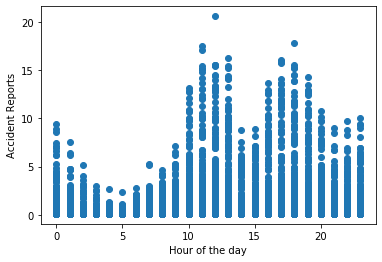

In [0]:
plt.scatter(x.values,Y)
plt.xlabel("Hour of the day")
plt.ylabel("Accident Reports")